In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Chap 11. 시계열 분석
## 11.1 시계열 분석 개요

- 시간에 흐름에 따라 일정한 간격으로 사건을 관찰하여 기록한 데이터를 바탕으로 미래의 관측값을 예측
- 일반적으로 추세(trend), 계절(season), 불규칙(irregular) 등으로 구성되며 이 성분들에 의해 변동된다고 가정
- 절차
1) 시계열 데이터 생성
    - 시계열 객체 생성 : 관측값 뿐만 아니라 시작 시점과 종료 시점, 주기 등의 정보 포함
2) 탐색적 분석을 통해 데이터 특성 이해
    - 시각화로 시계열 데이터의 변동 패턴 관찰
    - 성분분해를 통해 추세, 계절, 뷸규칙 성분으로 세분화
3) 미래 관측값에 대한 예측
    - 지수모델링(exponential modeling) : 관측값의 가중평균 이용
    - ARIMA(autoregressive integrated moving average) : 관측값과 오차간의 상관 이용

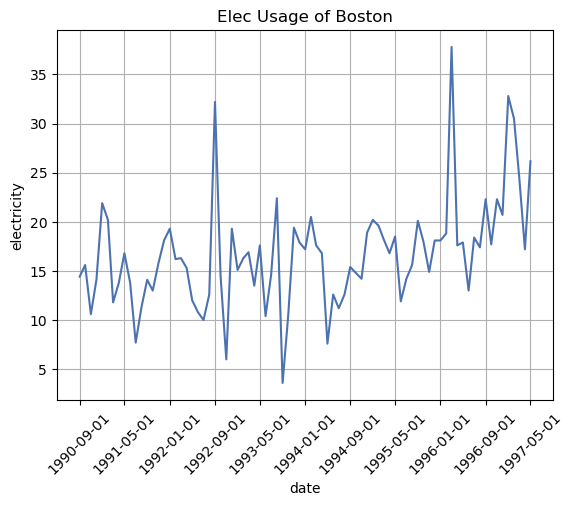

In [119]:
utility = pd.read_csv("../data/kwak/utility.txt", header=None, index_col=1).reset_index().drop(0, axis=1).set_index(1).iloc[:, 6]
utility.index = pd.to_datetime(utility.index, infer_datetime_format=True) # 자동 포맷 유추

p = so.Plot(x=utility.index, y=utility.values).add(so.Line()).label(x='date', y='electricity', title='Elec Usage of Boston')
fig, ax = plt.subplots()
p.on(ax).plot()

tick_interval = len(utility.index) // 10 if len(utility.index) > 10 else 1 # 간격 조절
selected_ticks = utility.index[::tick_interval]
ax.set_xticks(selected_ticks)
ax.set_xticklabels(selected_ticks.strftime('%Y-%m-%d'), rotation=45);
plt.grid()

## Datetime Module

In [129]:
import datetime
now = datetime.datetime.now()
print(now.strftime("%Y-%m-%d %H:%M:%S"))
print(now + datetime.timedelta(days=1))
print(pd.to_datetime(now))
print(now.weekday())

2024-12-15 22:34:08
2024-12-16 22:34:08.512428
2024-12-15 22:34:08.512428
6


In [134]:
utility['1990-09-01':'1990-12-30':3]

1
1990-09-01    14.4
1990-12-01    14.1
Name: 8, dtype: float64